Shape: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  flo

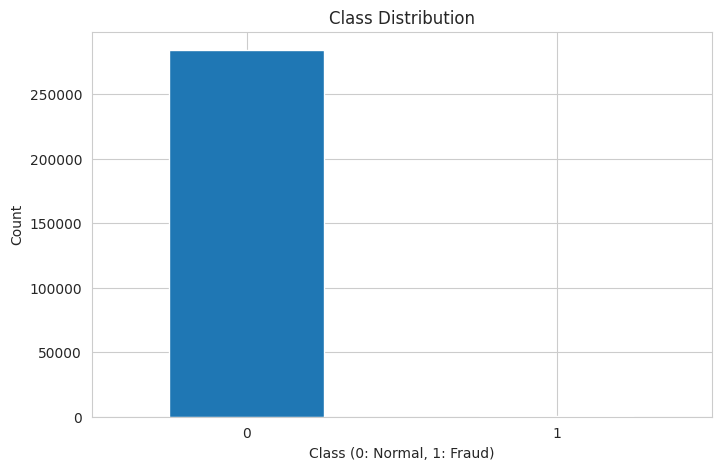

=== Amount Statistics ===
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


/tmp/ipykernel_9783/1274024947.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']],


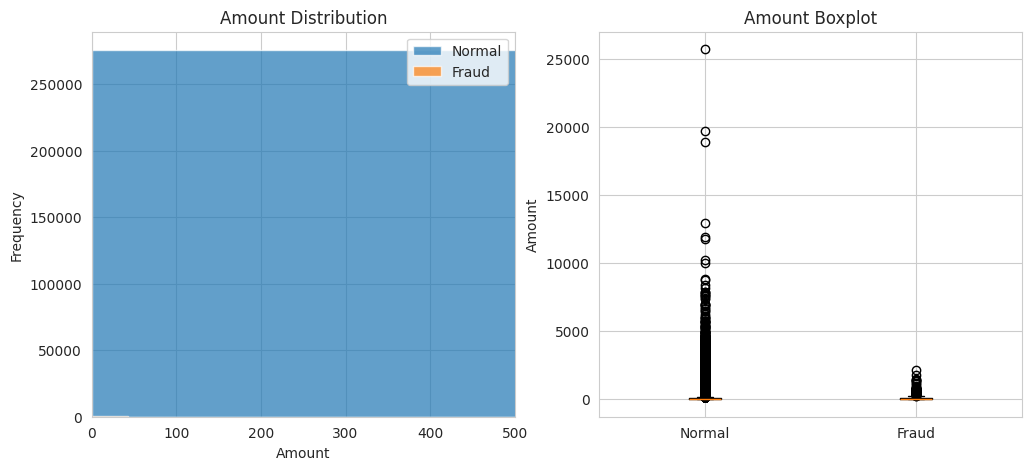

In [ ]:
# Cellule 1 : Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

# Cellule 2 : Charger données
df = pd.read_csv('../data/creditcard.csv')
print(f"Shape: {df.shape}")
df.head()

# Cellule 3 : Info dataset
print(df.info())
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Cellule 4 : Distribution des classes
print("=== Class Distribution ===")
print(df['Class'].value_counts())
print(f"\nFraud percentage: {df['Class'].sum() / len(df) * 100:.3f}%")

# Visualisation
plt.figure(figsize=(8, 5))
df['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Cellule 5 : Statistiques Amount
print("=== Amount Statistics ===")
print(df['Amount'].describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[df['Class']==0]['Amount'], bins=50, alpha=0.7, label='Normal')
plt.hist(df[df['Class']==1]['Amount'], bins=50, alpha=0.7, label='Fraud')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Amount Distribution')
plt.legend()
plt.xlim([0, 500])

plt.subplot(1, 2, 2)
plt.boxplot([df[df['Class']==0]['Amount'], df[df['Class']==1]['Amount']], 
            labels=['Normal', 'Fraud'])
plt.ylabel('Amount')
plt.title('Amount Boxplot')
plt.show()

# Cellule 6 : Time distribution
plt.figure(figsize=(10, 5))
plt.scatter(df['Time'], df['Amount'], c=df['Class'], 
            cmap='coolwarm', alpha=0.3, s=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Amount')
plt.title('Transactions over Time')
plt.colorbar(label='Class')
plt.show()

# Cellule 7 : Correlation features (échantillon)
sample_df = df.sample(5000, random_state=42)
corr = sample_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Cellule 8 : Conclusions
print("""
=== KEY FINDINGS ===
1. Dataset highly imbalanced: ~0.17% fraud
2. 284,807 transactions total
3. 492 fraudulent transactions
4. Features V1-V28 are PCA-transformed (anonymized)
5. Amount varies widely
6. No missing values
7. Time span: ~2 days

=== NEXT STEPS ===
1. Handle class imbalance (SMOTE, undersampling)
2. Feature scaling (StandardScaler)
3. Train models (Logistic Regression, Random Forest)
4. Evaluate with appropriate metrics (F1, Recall, Precision)
""")